In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
from functions import *

# SIR Model on G(n,p) Network

Code adapted from first example found here: https://arxiv.org/pdf/2001.02436.pdf.

### Resources
* [Her colleague's paper](https://d1b10bmlvqabco.cloudfront.net/attach/k7v24tpzbybzr/jmca5mxi9t361a/k9ye8o2opt8i/jail_paper.pdf)
* [Daily Bruin Article](https://stack.dailybruin.com/2020/05/12/covid-model/)
* [Epidemics on Networks paper](https://arxiv.org/pdf/2001.02436.pdf)

### Coding Documentation

* https://networkx.github.io/documentation/stable/reference/index.html
* https://epidemicsonnetworks.readthedocs.io/en/latest/

### TODO:
**Emma & Sam**
* Get more appropriate graph for a prison
* Set parameters to be COVID specific --- Check paper she posted

**Me & Marcel**
* Figure out how to incorporate birth rate into prison
* Figure out how to incorporate inmate releases
* Use SIR model

### Assumptions:
- Added nodes are susceptible (not I or R)

## Set Parameters

In [20]:
# Set G(n,p) model-specific parameters
N = 1000 # number of individuals
kave = 5 # expected number of contacts per person

In [63]:
# Set simulation-specific parameters
infected_list = [0,1] # initial nodes that are infected
recovered_list = [] # initial nodes that are recovered
tau = 0.7 # transmission rate
gamma = 1.0 # recovery rate
max_time = 40

## Generate graph

In [64]:
G = nx.fast_gnp_random_graph(N, kave/(N-1))

# Run Simulation

In [65]:
t = []
S = []
I = []
R = []

# Loop over time
for i in range(max_time):
    # Run simulation
    data = EoN.fast_SIR(G, tau, gamma, initial_infecteds=infected_list, initial_recovereds=recovered_list,\
                        tmin=i, tmax=i+1, return_full_data=True)
    
    # Update infected and recovered nodelists
    infected_list, recovered_list = get_infected(data, i+1), get_recovered(data, i+1)
    
    # Add and remove nodes
    r = 0
    if (len(infected_list)>50):
        r=50
    G, infected_list, recovered_list = recalibrate_graph(G, infected_list, recovered_list, 0, 0)
    
    t.append(i)
    I.append(len(infected_list))
    R.append(len(recovered_list))
    S.append(len(G.nodes)-R[-1]-I[-1])

## Plot Results

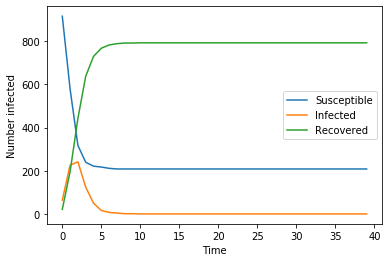

In [66]:
plt.plot(t, S, label = 'Susceptible')
plt.plot(t, I, label = 'Infected')
plt.plot(t, R, label = 'Recovered')
# plt.plot(t_deaths, deaths, label = 'Deaths')

plt.xlabel('Time')
plt.ylabel('Number infected')
plt.legend()
plt.show()